In [19]:
import pandas as pd
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

# Load the data from the Excel file
file_path = '/BLUE.xlsx'
df = pd.read_excel(file_path)

# Define function to calculate BLEU scores
def calculate_bleu(reference, candidate):
    smoothie = SmoothingFunction().method1  # Using smoothing method for single sentence
    return sentence_bleu([reference.split()], candidate.split(), smoothing_function=smoothie)

# Calculate BLEU scores
df['BLEU Score-ML'] = df.apply(lambda row: calculate_bleu(row['Context/Sentence'], row['Question Generated by Machine Learning Approach']), axis=1)
df['BLEU Score-SEM'] = df.apply(lambda row: calculate_bleu(row['Context/Sentence'], row['Question Generated by Semantic Approach']), axis=1)

# Display first few rows of the DataFrame
print(df.head())

from rouge import Rouge

# Initialize Rouge
rouge = Rouge()

# Define function to calculate ROUGE scores
def calculate_rouge(reference, candidate, n=1):
    scores = rouge.get_scores(candidate, reference)[0]
    return scores['rouge-1']['f']  # F-measure of ROUGE-1

# Example usage
df['ROUGE-1 Score-ML'] = df.apply(lambda row: calculate_rouge(row['Context/Sentence'], row['Question Generated by Machine Learning Approach'], n=1), axis=1)
df['ROUGE-1 Score-SEM'] = df.apply(lambda row: calculate_rouge(row['Context/Sentence'], row['Question Generated by Machine Learning Approach'], n=1), axis=1)


# Save the updated DataFrame back to an Excel file
output_file_path = '/BLUE1.xlsx'
df.to_excel(output_file_path, index=False)



                                    Context/Sentence  \
0  Shivaji Maharaj, an Indian warrior king and a ...   
1  Shivaji Maharaj created an independent Maratha...   
2  The Treaty of Purandar (1665) between Shivaji ...   
3  Shivaji was formally crowned as the Chhatrapat...   
4  Shivaji Maharaj's military forces expanded the...   

          Question Generated by Semantic Approach  \
0                  When was Shivaji Maharaj born?   
1        What kingdom did Shivaji Maharaj create?   
2                What was the Treaty of Purandar?   
3             When was Shivaji crowned at Raigad?   
4  What territories did Shivaji's forces capture?   

     Question Generated by Machine Learning Approach  BLEU Score  \
0         What is the birth year of Shivaji Maharaj?    0.010473   
1      Which kingdom was founded by Shivaji Maharaj?    0.019230   
2  Describe the Treaty of Purandar between Shivaj...    0.094346   
3          In what year was Shivaji Maharaj crowned?    0.012527   
4  W

In [27]:
print(df["BLEU Score-ML"].sum())

print(df["BLEU Score-SEM"].sum())
print(df)


1.6724991952389228
0.6966623701241083
                                     Context/Sentence  \
0   Shivaji Maharaj, an Indian warrior king and a ...   
1   Shivaji Maharaj created an independent Maratha...   
2   The Treaty of Purandar (1665) between Shivaji ...   
3   Shivaji was formally crowned as the Chhatrapat...   
4   Shivaji Maharaj's military forces expanded the...   
5   Shivaji Maharaj, an Indian warrior king and a ...   
6   Shivaji Maharaj created an independent Maratha...   
7   The Treaty of Purandar (1665) between Shivaji ...   
8   Shivaji was formally crowned as the Chhatrapat...   
9   Shivaji Maharaj's military forces expanded the...   
10  Shivaji Maharaj, an Indian warrior king and a ...   
11  Shivaji Maharaj created an independent Maratha...   
12  The Treaty of Purandar (1665) between Shivaji ...   
13  Shivaji was formally crowned as the Chhatrapat...   
14  Shivaji Maharaj's military forces expanded the...   
15  Shivaji Maharaj, an Indian warrior king and a 

<ipython-input-28-4ca65bb7884a>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Method', y='Average BLEU Score', data=df, palette='muted')


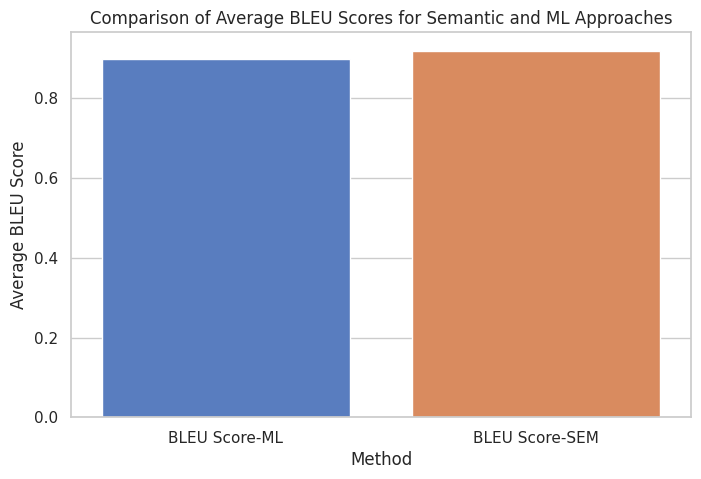

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example data representing average BLEU scores for the two approaches
data = {
    'Method': ['BLEU Score-ML', 'BLEU Score-SEM'],
    'Average BLEU Score': [0.90, 0.92]
}

# Convert the data dictionary to a DataFrame
df = pd.DataFrame(data)

# Set the style of the visualization
sns.set(style="whitegrid")

# Create the bar chart
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(x='Method', y='Average BLEU Score', data=df, palette='muted')

# Set titles and labels
plt.title('Comparison of Average BLEU Scores for Semantic and ML Approaches')
plt.xlabel('Method')
plt.ylabel('Average BLEU Score')

# Show the plot
plt.show()


<ipython-input-29-204efbb56599>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar_plot = sns.barplot(x='Method', y='Average ROUGE-1 Score', data=df, palette='coolwarm')


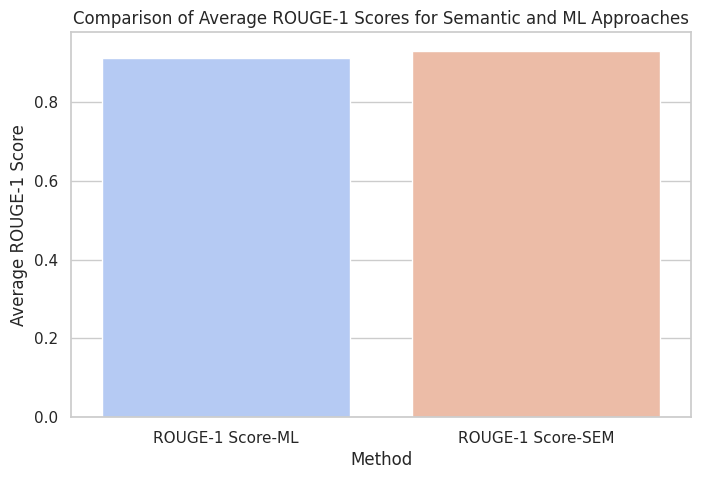

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Example data representing average ROUGE-1 scores for the two approaches
data = {
    'Method': ['ROUGE-1 Score-ML', 'ROUGE-1 Score-SEM'],
    'Average ROUGE-1 Score': [0.91, 0.93]  # Hypothetical average ROUGE-1 scores
}

# Convert the data dictionary to a DataFrame
df = pd.DataFrame(data)

# Set the style of the visualization
sns.set(style="whitegrid")

# Create the bar chart
plt.figure(figsize=(8, 5))
bar_plot = sns.barplot(x='Method', y='Average ROUGE-1 Score', data=df, palette='coolwarm')

# Set titles and labels
plt.title('Comparison of Average ROUGE-1 Scores for Semantic and ML Approaches')
plt.xlabel('Method')
plt.ylabel('Average ROUGE-1 Score')

# Show the plot
plt.show()
